In [25]:
import pandas as pd
import tslib as pdt
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import pmdarima as pmd
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
pmd = pmd.auto_arima

In [26]:
data = pd.read_csv("train.csv", header=0, parse_dates=True)

In [27]:
#Data Cleaning

In [28]:
# Taking data for store 1
# Filter when store == 1 and dropping Store column
Dataframe = pd.DataFrame(data)
Dataframe = Dataframe[Dataframe['Store'] == 1]
Dataframe = Dataframe.drop(['Store'], axis=1)

In [29]:
# Taking data for 10 departments
Dataframe = Dataframe[Dataframe['Dept'] < 11]
Dataframe_ten= Dataframe[Dataframe['Dept'] < 11]

#Dicky Fuller test for Stationarity:
#We are checking that our data is stationary or not 

result = adfuller(Dataframe_ten['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0])) 
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.835366686941565
p-value: 0.0025655024073457182
Critical Values:
	1%: -3.434979825137732
	5%: -2.8635847436211317
	10%: -2.5678586114197954


In [30]:
#filtered departmentwise data, taking data of 10 departments and making dataframe of each department
arrayOfDept = []
storeValue=1
iterate=len(Dataframe)
for i in range(iterate): 
    if(storeValue < 11):
        storeData = Dataframe[Dataframe['Dept'] == storeValue]
        storeData = storeData.drop(['Dept'], axis=1)
        storeData = storeData.drop(['IsHoliday'], axis=1)
        arrayOfDept.append(storeData)
        storeValue = storeValue+1



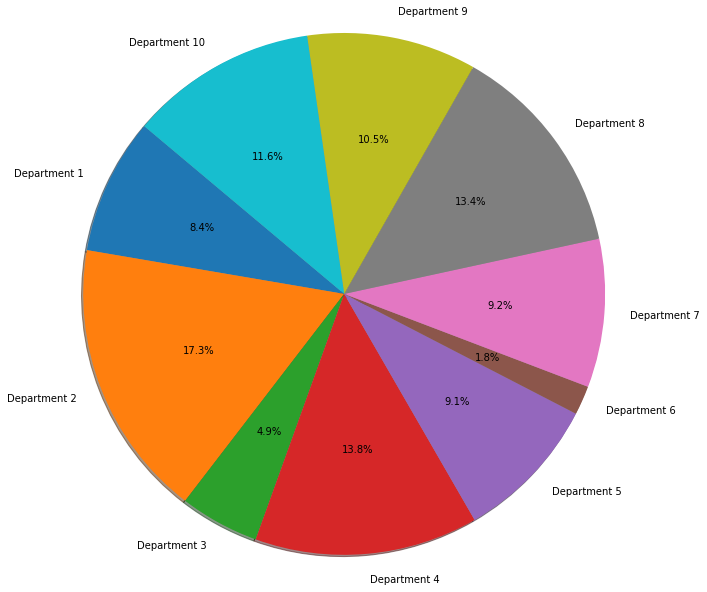

In [31]:
#Piechart for 10 departments

piechartData = []
labels=[]
for i in range(len(arrayOfDept)):
    name = 'Department '+str(i+1)
    labels.append(name)
    piechartData.append(arrayOfDept[i]['Weekly_Sales'].sum(axis = 0, skipna = True))

piechar = plt.pie(piechartData, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140, radius =3)


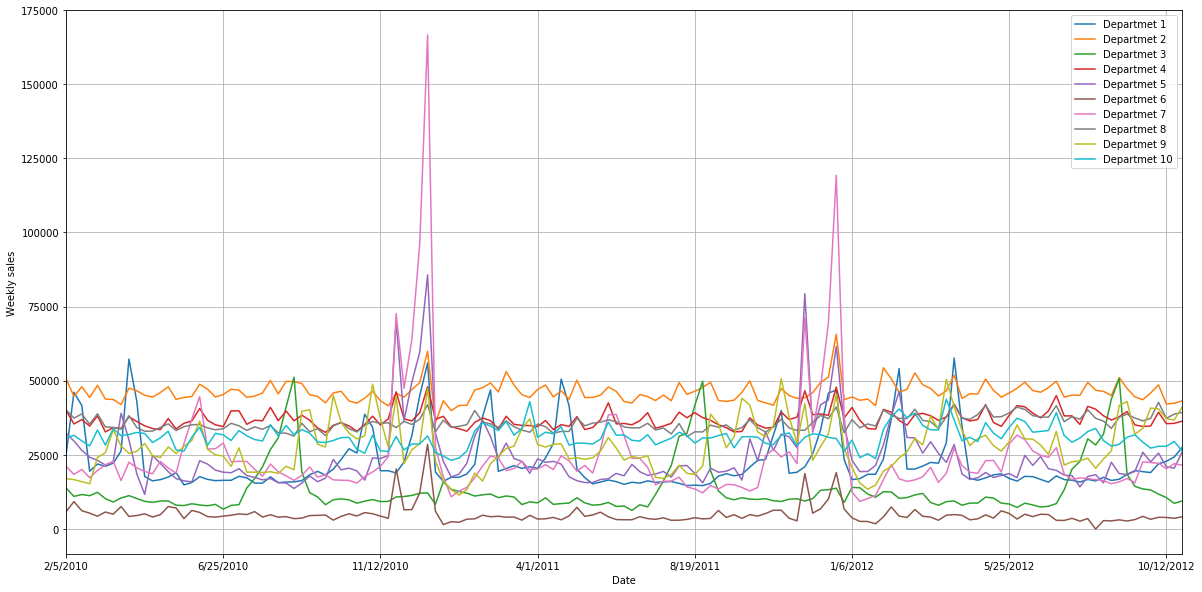

In [32]:
#plotting graphs using looping through arrayOfDept
ax = plt.figure(figsize=(20,10)).gca()

length=len(arrayOfDept)
plt.xlabel('Dates')
plt.ylabel('Weekly sales')
for i in range(0,length):
 name = "Departmet "+str(i+1)
 arrayOfDept[i].plot(kind='line', x='Date',y='Weekly_Sales',label=name,ax=ax, grid=True)

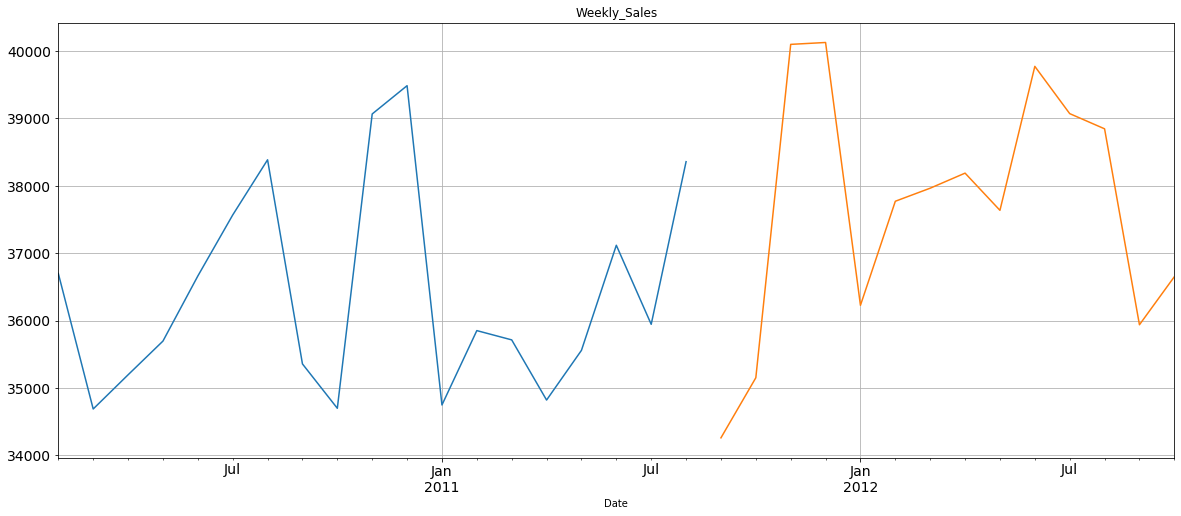

In [9]:
data=arrayOfDept[3]
# print(data)

data.Date = pd.to_datetime(data.Date,format='%m/%d/%Y')
data.index = data.Date
data = data.drop('Date', axis=1)

data = data.resample('MS').mean() 
# Resmapling the time series data with month starting first.
# Train-Test splitting of time series data


#We are splitting our data to 60% for train
train_data = data[:int(0.6*(len(data)))] 

#We are splitting our data to 40% for test
test_data = data[int(0.6*(len(data))):]

# Picking Weekly sales from dataset into test and train
train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales'] 

# Plot of Weekly_Sales with respect to years in train and test.
train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14, grid=True)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14, grid=True)
plt.show()


In [10]:
# model_auto_arima = pmd(train_data, trace=True, error_action='ignore', suppress_warnings=True)
model_auto_arima = pmd(train_data, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,stepwise=False, suppress_warnings=True, D=1, max_D=10,error_action='ignore',approximation = False)
model_auto_arima.fit(train_data)

Fit ARIMA: (0, 0, 0)x(0, 0, 0, 1) (constant=True); AIC=335.608, BIC=337.497, Time=0.232 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 1) (constant=True); AIC=336.318, BIC=339.152, Time=0.016 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 1) (constant=True); AIC=334.419, BIC=338.197, Time=0.116 seconds
Fit ARIMA: (0, 0, 3)x(0, 0, 0, 1) (constant=True); AIC=333.249, BIC=337.971, Time=0.154 seconds
Fit ARIMA: (0, 0, 4)x(0, 0, 0, 1) (constant=True); AIC=336.254, BIC=341.921, Time=0.201 seconds
Fit ARIMA: (0, 0, 5)x(0, 0, 0, 1) (constant=True); AIC=nan, BIC=nan, Time=0.100 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 1) (constant=True); AIC=337.352, BIC=340.185, Time=0.000 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 1) (constant=True); AIC=337.557, BIC=341.334, Time=0.062 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 1) (constant=True); AIC=339.740, BIC=344.462, Time=0.087 seconds
Fit ARIMA: (1, 0, 3)x(0, 0, 0, 1) (constant=True); AIC=363.380, BIC=369.047, Time=0.169 seconds
Fit ARIMA: (1, 0, 4)x(0, 0, 0, 1) (constant=True

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 1),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

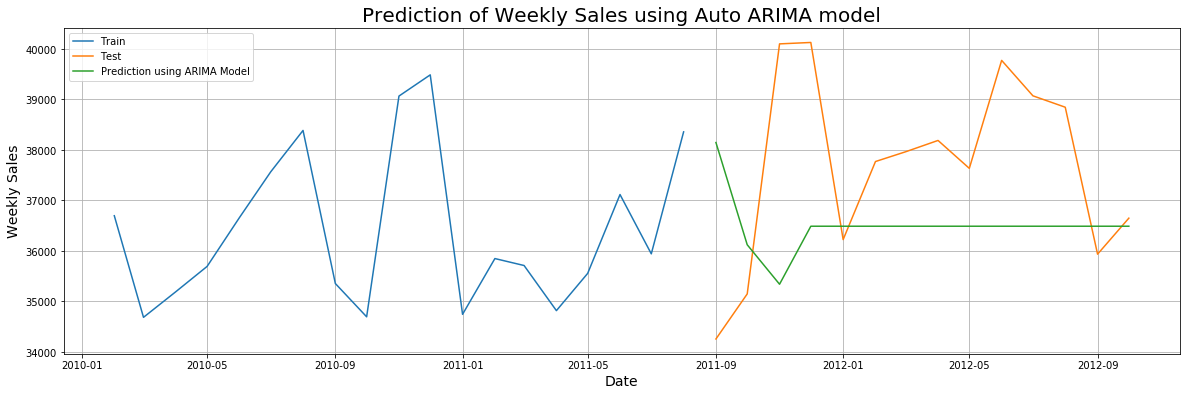

In [11]:
# Predicting the test values using predict function
forecast = model_auto_arima.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Auto ARIMA model', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Prediction using ARIMA Model')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.grid(b=True)
plt.show()

In [12]:
# Performance metric for ARIMA model -MSE/RMSE
print('Mean Squared Error (MSE) of ARIMA: ', mean_squared_error(test_data, forecast))
print('Root Mean Squared Error (RMSE) of ARIMA: ', math.sqrt(mean_squared_error(test_data, forecast)))
print('Mean Absolute Deviation (MAD) of ARIMA: ', mean_absolute_error(test_data, forecast))

Mean Squared Error (MSE) of ARIMA:  5955395.332788726
Root Mean Squared Error (RMSE) of ARIMA:  2440.3678683322983
Mean Absolute Deviation (MAD) of ARIMA:  2004.236633731453


C:\Users\Irtaza toti\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Irtaza toti\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Irtaza toti\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


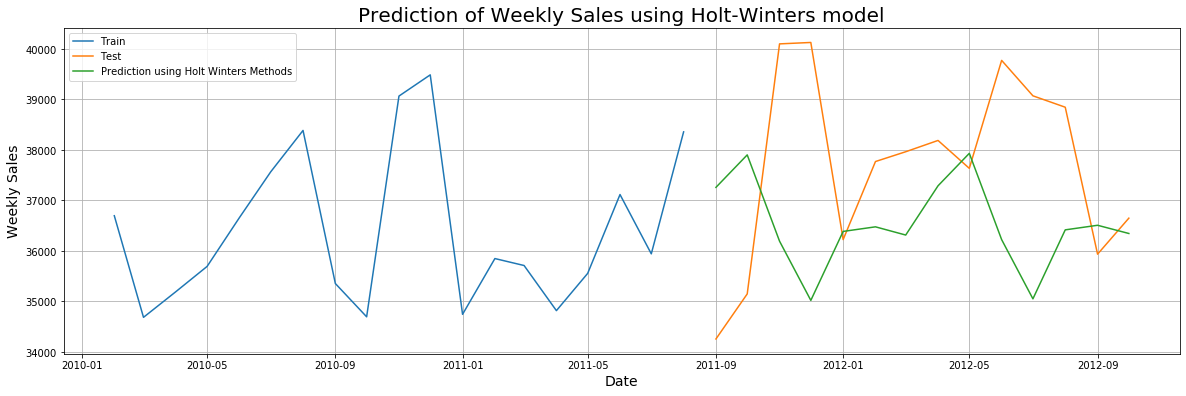

In [13]:
# Fitting the Holt-Winters method for Weekly Sales.
model_holt_winters = ExponentialSmoothing(train_data, seasonal_periods=7, trend='additive', seasonal='additive').fit()
pred = model_holt_winters.forecast(len(test_data))# Predict the test data
#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Holt-Winters model', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred, label='Prediction using Holt Winters Methods')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.grid(b=True)
plt.show()